 # Converting a grid model from CIM CGMES (v2.4.15) to pandapower


Import the pandapower library and the neccessary methods for the conversion as follows:

In [1]:
import os

import pandas as pd

import pandapower as pp
from pandapower.converter import from_cim as cim2pp

LightSimBackend import error: No module named 'grid2op'
PhysicalLawChecker import error: No module named 'grid2op'
TimeSerie import error: cannot import name 'TimeSerie' from 'lightsim2grid.timeSerie' (C:\ProgramData\miniconda3\envs\py3.11\Lib\site-packages\lightsim2grid\timeSerie.py)
ContingencyAnalysis import error: cannot import name 'ContingencyAnalysis' from 'lightsim2grid.contingencyAnalysis' (C:\ProgramData\miniconda3\envs\py3.11\Lib\site-packages\lightsim2grid\contingencyAnalysis.py)
rewards import error: No module named 'grid2op'


## CIM CGMES to pandapower

First we start by defining the path of the CGMES zip files, which can convert to PandaPower. When using the ENTSO-E test models, make sure to include the Boundary profiles as well. Then call the converter.

In [2]:
# folder_path points to the directory where the CIM .zip-Files are stored:
folder_path = os.path.join(os.getcwd(), 'example_cim')

# cgmes_files is a list containing paths to both files needed for the CIM converter:
cgmes_files = [os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_Boundary_v3.0.0.zip'),
               os.path.join(folder_path, 'CGMES_v2.4.15_SmallGridTestConfiguration_BaseCase_Complete_v3.0.0.zip')]

for f in cgmes_files:
    if not os.path.exists(f):
        raise UserWarning(f"Wrong path specified for the CGMES file {f}")

net = cim2pp.from_cim(file_list=cgmes_files, use_GL_or_DL_profile='DL')

print('Conversion successful')

Conversion successful


## Run the power flow
Once the network is converted to pandapower, we can run a power flow:

In [3]:
pp.runpp(net)
print(net.res_bus.iloc[0:5]) # print first few bus results

      vm_pu  va_degree   p_mw     q_mvar
0  0.974052 -18.213450   39.0  10.000000
1  1.050000  -1.952397 -220.0 -38.767059
2  0.945710  -8.057535   33.0  15.000000
3  0.973778 -18.504162   20.0   9.000000
4  0.966486 -18.585519   90.0  30.000000


## Plot the converted network and visualize results

Preliminary requirements:
* This plotting demo only works if the imported CIM network has geo data (GL/DL profile). If not, you can create generic coordinates using the following instructions:
https://pandapower.readthedocs.io/en/latest/plotting/matplotlib/generic.html and then run the cells below.
* Matplotlib is required (can be installed via conda)

Some geocoordinates are missing, and the easiest way is to copy some over.

In [7]:
bus_geo = net.bus.geo.iloc[0]
net.bus.geo.fillna(bus_geo, inplace=True)

Start plotting the grid

<Axes: >

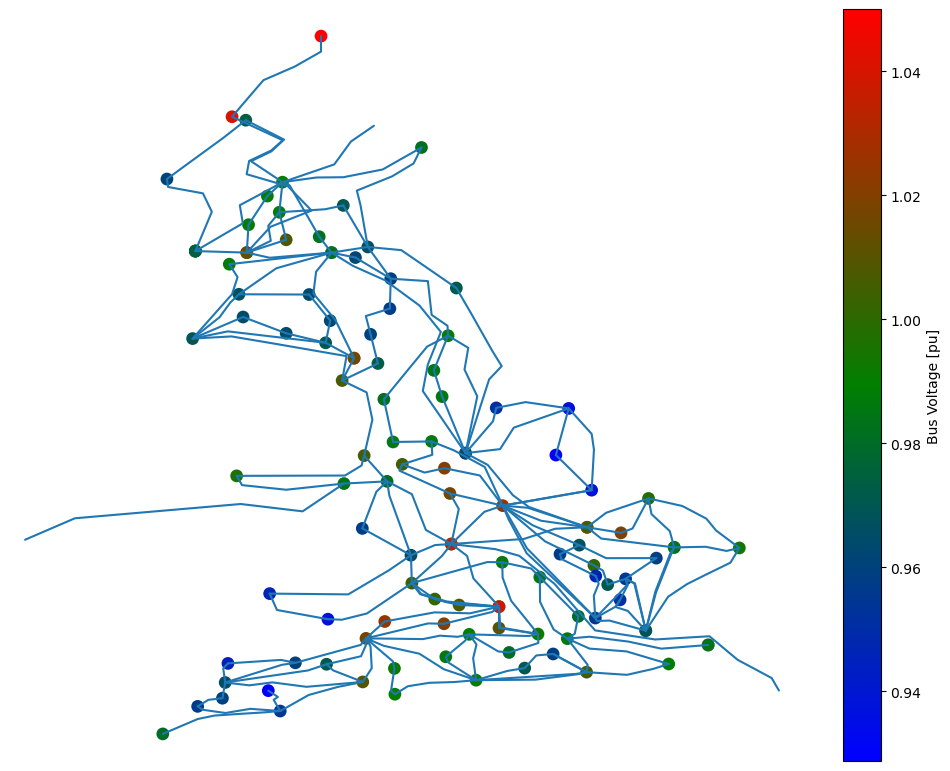

In [8]:
import pandapower.plotting as plt
import pandapower.plotting.colormaps as cmaps

cmap_list = [(0.9, "blue"), (1.0, "green"), (1.1, "red")]
cmap, norm = cmaps.cmap_continuous(cmap_list)

sizes = plt.get_collection_sizes(net)

bc = plt.create_bus_collection(net,net.bus.index.values,cmap=cmap, size=sizes['bus'])
lc = plt.create_line_collection(net,net.line.index.values, use_bus_geodata=True)
tc = plt.create_trafo_collection(net,net.trafo.index.values, size=sizes["trafo"])
plt.draw_collections([bc,lc,tc])